In [49]:
##detect speaker using deeplearning

In [2]:
import tensorflow as tf
import os
from os.path import isfile, join
import numpy as np
import shutil
from tensorflow import keras
from pathlib import Path
from IPython.display import display, Audio 
import subprocess

In [3]:
data_directory = "testing"
audio_folder= "audio"
noise_folder = "noises"
audio_path = os.path.join(data_directory, audio_folder) 
noise_path = os.path.join(data_directory, noise_folder)

In [4]:
audio_path

'testing\\audio'

In [5]:
noise_path

'testing\\noises'

In [6]:
voicefile_names=os.listdir ("testing/audio")

# path = 'testing/audio'
# if os.path.exists(path):
#     voicefile_names = os.listdir(path)
# else:
#     print(f"The directory '{path}' does not exist.")


In [7]:
voicefile_names

['speaker1',
 'speaker10',
 'speaker11',
 'speaker12',
 'speaker13',
 'speaker14',
 'speaker2',
 'speaker3',
 'speaker5',
 'speaker6',
 'speaker7',
 'speaker8',
 'speaker9']

In [8]:
noisefile_names=os.listdir("testing/noises")

In [9]:
noisefile_names

['other', '_background_noise_']

In [10]:
voice_files_count=[]

In [11]:
for t in voicefile_names:
    p=os.listdir("testing/audio"+"/"+t)
    len_class=len(p)
    voice_files_count.append(len_class)

In [12]:
voice_files_count

[612, 612, 612, 612, 612, 612, 612, 603, 612, 612, 612, 612, 612]

In [13]:
noise_files_count=[] 

In [14]:
for t in noisefile_names:
    p=os.listdir("testing/noises"+"/"+t)
    len_class=len(p)
    noise_files_count.append(len_class)


In [15]:
noise_files_count

[2, 4]

In [16]:
import plotly.express as px
import numpy


random_x = voicefile_names 
random_y = voice_files_count
fig = px.bar(random_x, y = random_y) 
fig.show()

In [17]:
valid_split = 0.1 
shuffle_seed = 43
sample_rate= 16000
scale = 0.5
batch_size = 128
epochs = 15

In [18]:
noise_paths = []
for subdir in os.listdir (noise_path): 
    subdir_path = Path (noise_path) / subdir 
    if os.path.isdir (subdir_path):
        noise_paths += [
            os.path.join(subdir_path, filepath)
            for filepath in os.listdir(subdir_path) 
                if filepath.endswith(".wav")
        ]


In [19]:
audio_paths = []
for subdir in os.listdir (audio_path): 
    subdir_path = Path (audio_path) / subdir 
    if os.path.isdir (subdir_path):
        audio_paths += [
            os.path.join(subdir_path, filepath)
            for filepath in os.listdir(subdir_path) 
                if filepath.endswith(".wav")
        ]


In [20]:
audio_paths

['testing\\audio\\speaker1\\resampled_speaker1_0.wav',
 'testing\\audio\\speaker1\\resampled_speaker1_1.wav',
 'testing\\audio\\speaker1\\resampled_speaker1_10.wav',
 'testing\\audio\\speaker1\\resampled_speaker1_100.wav',
 'testing\\audio\\speaker1\\resampled_speaker1_101.wav',
 'testing\\audio\\speaker1\\resampled_speaker1_102.wav',
 'testing\\audio\\speaker1\\resampled_speaker1_103.wav',
 'testing\\audio\\speaker1\\resampled_speaker1_104.wav',
 'testing\\audio\\speaker1\\resampled_speaker1_105.wav',
 'testing\\audio\\speaker1\\resampled_speaker1_106.wav',
 'testing\\audio\\speaker1\\resampled_speaker1_107.wav',
 'testing\\audio\\speaker1\\resampled_speaker1_108.wav',
 'testing\\audio\\speaker1\\resampled_speaker1_109.wav',
 'testing\\audio\\speaker1\\resampled_speaker1_11.wav',
 'testing\\audio\\speaker1\\resampled_speaker1_110.wav',
 'testing\\audio\\speaker1\\resampled_speaker1_111.wav',
 'testing\\audio\\speaker1\\resampled_speaker1_112.wav',
 'testing\\audio\\speaker1\\resampled

In [21]:
noise_paths

['testing\\noises\\other\\Oexercise_bike.wav',
 'testing\\noises\\other\\Opink_noise.wav',
 'testing\\noises\\_background_noise_\\O10convert.com_Audience-Claps_daSG5fwdA7o.wav',
 'testing\\noises\\_background_noise_\\Odoing_the_dishes.wav',
 'testing\\noises\\_background_noise_\\Odude_miaowing.wav',
 'testing\\noises\\_background_noise_\\Orunning_tap.wav']

In [22]:
import librosa
x, sr = librosa.load ('testing/noises/other/Oexercise_bike.wav')

In [23]:
print(x.shape)
print(sr)

(1350650,)
22050


In [24]:
x1, sr1 = librosa.load ('testing/audio/speaker1/resampled_speaker1_4.wav')

In [25]:
print(x1.shape)
print(sr1)

(22050,)
22050


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt 
import librosa.display

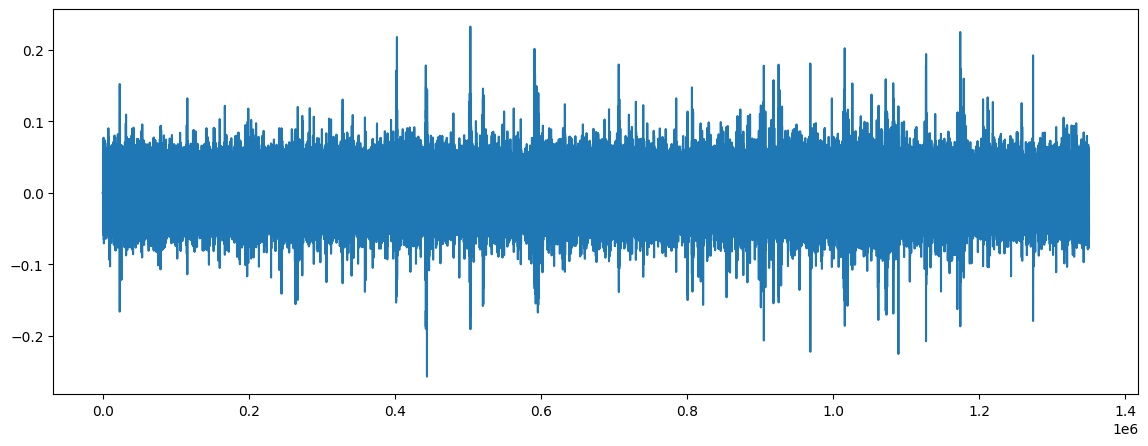

In [27]:
#plt.figure(figsize=(14, 5))
#librosa.display.waveshow(x, sr=sr)
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.plot(x)
plt.show()

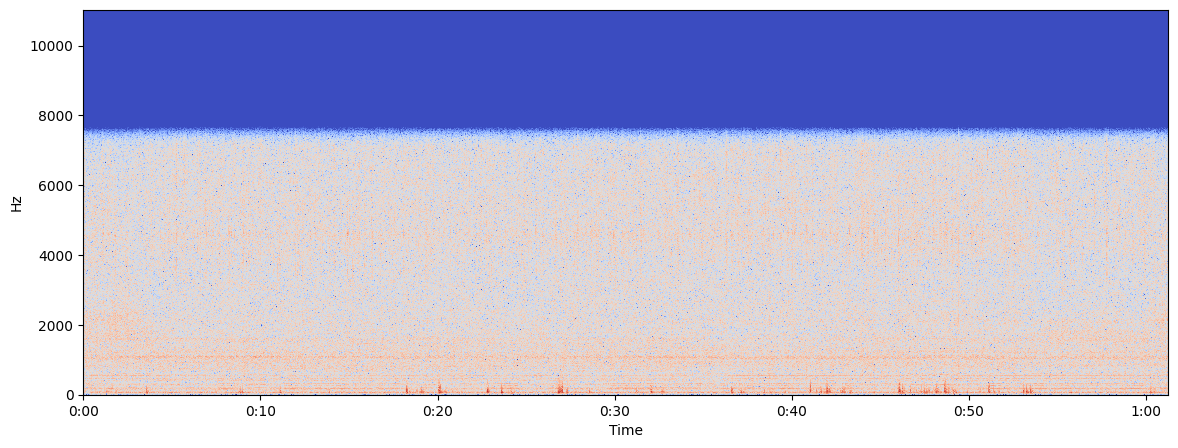

In [28]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [29]:
import IPython.display as ipd
ipd.Audio('testing/noises/other/Oexercise_bike.wav') # load a local WAV file



In [30]:
#os.system(command)
def load_audio_sample(path):
    sample, sampling_rate = tf.audio.decode_wav(tf.io.read_file(path), desired_channels=1)
    
    #sample, sampling_rate= librosa.load (path, sr=16000)
    print("sampling rate of original audio", sampling_rate) 
    if sampling_rate == sample_rate:
        print("shape", sample.shape[0])
        slices = int(sample.shape[0] / sample_rate) 
        print(slices)
        sample = tf.split(sample[: slices * sample_rate], slices) 
        return sample
    else:
        print("Sampling rate for", path, "is incorrect")
        return None
    
audio = []
for path in audio_paths:
    sample = load_audio_sample(path)
    if sample:
        audio.extend(sample)

audio = tf.stack(audio)


sampling rate of original audio tf.Tensor(16000, shape=(), dtype=int32)
shape 16000
1
sampling rate of original audio tf.Tensor(16000, shape=(), dtype=int32)
shape 16000
1
sampling rate of original audio tf.Tensor(16000, shape=(), dtype=int32)
shape 16000
1
sampling rate of original audio tf.Tensor(16000, shape=(), dtype=int32)
shape 16000
1
sampling rate of original audio tf.Tensor(16000, shape=(), dtype=int32)
shape 16000
1
sampling rate of original audio tf.Tensor(16000, shape=(), dtype=int32)
shape 16000
1
sampling rate of original audio tf.Tensor(16000, shape=(), dtype=int32)
shape 16000
1
sampling rate of original audio tf.Tensor(16000, shape=(), dtype=int32)
shape 16000
1
sampling rate of original audio tf.Tensor(16000, shape=(), dtype=int32)
shape 16000
1
sampling rate of original audio tf.Tensor(16000, shape=(), dtype=int32)
shape 16000
1
sampling rate of original audio tf.Tensor(16000, shape=(), dtype=int32)
shape 16000
1
sampling rate of original audio tf.Tensor(16000, shape

In [31]:
#os.system(command)
def load_noise_sample(path):
    sample, sampling_rate = tf.audio.decode_wav(tf.io.read_file(path), desired_channels=1)
    
    #sample, sampling_rate= librosa.load (path, sr=16000)
    print("sampling rate of original audio", sampling_rate) 
    if sampling_rate == sample_rate:
        print("shape", sample.shape[0])
        slices = int(sample.shape[0] / sample_rate) 
        print(slices)
        sample = tf.split(sample[: slices * sample_rate], slices) 
        return sample
    else:
        print("Sampling rate for", path, "is incorrect")
        return None
    
noises = []
for path in noise_paths:
    sample = load_noise_sample(path)
    if sample:
        noises.extend(sample)

noises = tf.stack(noises)


sampling rate of original audio tf.Tensor(16000, shape=(), dtype=int32)
shape 980063
61
sampling rate of original audio tf.Tensor(16000, shape=(), dtype=int32)
shape 960000
60
sampling rate of original audio tf.Tensor(16000, shape=(), dtype=int32)
shape 260686
16
sampling rate of original audio tf.Tensor(16000, shape=(), dtype=int32)
shape 1522931
95
sampling rate of original audio tf.Tensor(16000, shape=(), dtype=int32)
shape 988892
61
sampling rate of original audio tf.Tensor(16000, shape=(), dtype=int32)
shape 978489
61


In [32]:
noises

<tf.Tensor: shape=(354, 16000, 1), dtype=float32, numpy=
array([[[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ...,
        [-0.00695801],
        [ 0.00799561],
        [ 0.0350647 ]],

       [[ 0.02267456],
        [ 0.02301025],
        [ 0.03671265],
        ...,
        [ 0.04626465],
        [ 0.01608276],
        [-0.00585938]],

       [[ 0.0272522 ],
        [ 0.00085449],
        [-0.02471924],
        ...,
        [ 0.0274353 ],
        [ 0.00796509],
        [ 0.02160645]],

       ...,

       [[-0.17391968],
        [-0.01364136],
        [ 0.01049805],
        ...,
        [-0.0267334 ],
        [-0.08328247],
        [-0.05822754]],

       [[ 0.03665161],
        [ 0.01702881],
        [-0.05337524],
        ...,
        [-0.11270142],
        [-0.06530762],
        [ 0.0892334 ]],

       [[-0.06396484],
        [ 0.03543091],
        [ 0.01025391],
        ...,
        [ 0.00622559],
        [-0.07485962],
        [ 0.10687256]]], dtype=float3

In [33]:
##Dataset Generation
def paths_and_labels_to_dataset (audio_paths, labels): 
    path_ds = tf.data.Dataset.from_tensor_slices(audio_paths) 
    audio_ds = path_ds.map(lambda x: path_to_audio(x)) 
    label_ds = tf.data.Dataset.from_tensor_slices(labels) 
    return tf.data.Dataset.zip((audio_ds, label_ds))

In [34]:
def path_to_audio (path):
    audio = tf.io.read_file(path)
    audio, _ = tf.audio.decode_wav (audio, 1, sample_rate) 
    return audio

In [35]:
#Add noise to Dataset - Data Augmentation
def add_noise (audio, noises=None, scale=0.5):
    if noises is not None:
        tf_rnd= tf.random.uniform(
            (tf.shape(audio)[0],), 0, noises.shape[0], dtype=tf.int32
        )
        noise = tf.gather (noises, tf_rnd, axis=0)
        prop= tf.math.reduce_max(audio, axis=1) / tf.math.reduce_max(noise, axis=1) 
        prop= tf.repeat(tf.expand_dims(prop, axis=1), tf.shape(audio)[1], axis=1)

        audio = audio + noise * prop * scale
    return audio

In [36]:
def audio_to_fft (audio):
   audio = tf.squeeze (audio, axis=-1)
   fft = tf.signal.fft(tf.cast(tf.complex(real=audio, imag=tf.zeros_like(audio)), tf.complex64))
   fft = tf.expand_dims(fft, axis=-1)

   return tf.math.abs(fft[:, : (audio.shape[1] // 2), :])



In [37]:
class_names = os.listdir(audio_path) 
print(class_names,)

audio_paths = []
labels = []
for label, name in enumerate(class_names): 
    print("Speaker:", (name))
    dir_path = Path(audio_path) / name
    speaker_sample_paths = [
        os.path.join(dir_path, filepath) 
        for filepath in os.listdir(dir_path) 
        if filepath.endswith(".wav")
    ]
        
    audio_paths += speaker_sample_paths
    labels += [label] * len(speaker_sample_paths)

['speaker1', 'speaker10', 'speaker11', 'speaker12', 'speaker13', 'speaker14', 'speaker2', 'speaker3', 'speaker5', 'speaker6', 'speaker7', 'speaker8', 'speaker9']
Speaker: speaker1
Speaker: speaker10
Speaker: speaker11
Speaker: speaker12
Speaker: speaker13
Speaker: speaker14
Speaker: speaker2
Speaker: speaker3
Speaker: speaker5
Speaker: speaker6
Speaker: speaker7
Speaker: speaker8
Speaker: speaker9


In [38]:
# Shuffle to generate random data 
rng = np.random.RandomState(shuffle_seed) 
rng.shuffle (audio_paths)
rng = np.random.RandomState(shuffle_seed) 
rng.shuffle (labels)

In [39]:
# Split into training and validation
num_val_samples = int(valid_split * len(audio_paths)) 
train_audio_paths = audio_paths[:-num_val_samples] 
train_labels = labels[:-num_val_samples]

valid_audio_paths = audio_paths[-num_val_samples:] 
valid_labels = labels[-num_val_samples:]

In [40]:
# Create datasets, one for training and the other for validation 
train_ds = paths_and_labels_to_dataset(train_audio_paths, train_labels)
train_ds = train_ds.shuffle(buffer_size=batch_size * 8, seed=shuffle_seed).batch(batch_size)

valid_ds = paths_and_labels_to_dataset(valid_audio_paths, valid_labels)
valid_ds = valid_ds.shuffle(buffer_size=32 * 8, seed=shuffle_seed).batch(32)


In [41]:
# Add noise to the training set
train_ds = train_ds.map(
    lambda x, y: (add_noise (x, noises, scale=scale), y), 
    num_parallel_calls=tf.data.experimental. AUTOTUNE,)

# Transform audio wave to the frequency domain using `audio_to_fft`
train_ds = train_ds.map(
    lambda x, y: (audio_to_fft(x), y), num_parallel_calls=tf.data.experimental.AUTOTUNE)

train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)

valid_ds = valid_ds.map(
    lambda x, y: (audio_to_fft(x), y), num_parallel_calls=tf.data.experimental.AUTOTUNE)

valid_ds = valid_ds.prefetch(tf.data.experimental.AUTOTUNE)


In [42]:
#Model building
from tensorflow.keras.layers import Conv1D

In [43]:
def residual_block (x, filters, conv_num = 3, activation = "relu"): 
    s = keras.layers.Conv1D(filters, 1, padding = "same")(x)
    
    for i in range(conv_num - 1):
        x = keras.layers.Conv1D (filters, 3, padding= "same")(x) 
        x = keras.layers.Activation(activation)(x)

    x = keras.layers.Conv1D(filters, 3, padding = "same")(x) 
    x = keras.layers.Add()([x, s])
    x = keras.layers.Activation(activation)(x)
    
    return keras.layers.MaxPool1D(pool_size = 2, strides = 2)(x)

def build_model(input_shape, num_classes): 
    inputs = keras.layers.Input(shape = input_shape, name="input")
    # Add a Conv1D layer to process the input with 1 channel
    #x = keras.layers.Conv1D(filters=16, kernel_size=1, padding="same")(inputs)
    x = residual_block(inputs, 16, 2)
    x = residual_block(inputs, 32, 2)
    x = residual_block(inputs, 64, 3) 
    x = residual_block(inputs, 128, 3) 
    x = residual_block(inputs, 128, 3)
    x = keras.layers.AveragePooling1D(pool_size=3, strides=3)(x)
    #x = layers.GlobalAveragePooling1D()(x)  # Global Average Pooling
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(256, activation="relu")(x)
    #x = keras.layers.Dense (128, activation="relu")(x)
    

    outputs = keras.layers.Dense(num_classes, activation = "softmax", name = "output")(x)
    
    return keras.models.Model(inputs = inputs, outputs = outputs)

model = build_model((sample_rate // 2, 1), len(class_names))

model.summary()

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) 
model_save_filename="model.keras"

earlystopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True) 
mdlcheckpoint_cb = keras.callbacks.ModelCheckpoint(model_save_filename, monitor="val_accuracy", save_best_only=True)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 8000, 1)   │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_15 (Conv1D)  │ (None, 8000, 128) │        512 │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 8000, 128) │          0 │ conv1d_15[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_16 (Conv1D)  │ (None, 8000, 128) │     49,280 │ activation_10[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_11       │ (None, 8000, 128) │          0 │ conv1d_16[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_17 (Conv1D)  │ (None, 8000, 128) │     49,280 │ activation_11[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 8000, 128) │        256 │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 8000, 128) │          0 │ conv1d_17[0][0],  │
│                     │                   │            │ conv1d_14[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_12       │ (None, 8000, 128) │          0 │ add_4[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_4     │ (None, 4000, 128) │          0 │ activation_12[0]… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling1d   │ (None, 1333, 128) │          0 │ max_pooling1d_4[… │
│ (AveragePooling1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 170624)    │          0 │ average_pooling1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │ 43,680,000 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 13)        │      1,677 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 43,813,901 (167.14 MB)

 Trainable params: 43,813,901 (167.14 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:

#print(f"Actual input shape: {train_ds.element_spec}")
#def reshape_data(data, label):
    #Reshape data to (batch_size, 8000, 1) (assuming single-channel audio)
 #   return tf.reshape(data, (-1, 8000, 1)), label

#train_ds = train_ds.map(reshape_data)  # Apply reshaping function to the dataset
#valid_ds = valid_ds.map(reshape_data)
#print(f"Actual input shape: {train_ds.element_spec}")

In [45]:
epochs = 15

In [46]:
#print(train_ds.element_spec)
#print(valid_ds.element_spec)

In [47]:
#print(train_ds.map(reshape_data))

In [48]:
#Training
#tf.config.run_functions_eagerly(False)
history = model.fit(
    train_ds,
    epochs = epochs,
    validation_data=valid_ds,
    callbacks=[earlystopping_cb, mdlcheckpoint_cb],
)


Epoch 1/15


56/56 ━━━━━━━━━━━━━━━━━━━━ 760s 13s/step - accuracy: 0.1946 - loss: 19.6834 - val_accuracy: 0.5831 - val_loss: 1.1725
Epoch 2/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 670s 12s/step - accuracy: 0.6291 - loss: 1.1676 - val_accuracy: 0.7846 - val_loss: 0.6799
Epoch 3/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 780s 14s/step - accuracy: 0.7431 - loss: 0.8277 - val_accuracy: 0.8199 - val_loss: 0.5473
Epoch 4/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 786s 14s/step - accuracy: 0.7872 - loss: 0.6530 - val_accuracy: 0.8312 - val_loss: 0.5071
Epoch 5/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 785s 14s/step - accuracy: 0.8253 - loss: 0.5479 - val_accuracy: 0.8829 - val_loss: 0.3594
Epoch 6/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 746s 13s/step - accuracy: 0.8278 - loss: 0.5110 - val_accuracy: 0.8778 - val_loss: 0.3851
Epoch 7/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 749s 13s/step - accuracy: 0.8566 - loss: 0.4246 - val_accuracy: 0.8778 - val_loss: 0.3713
Epoch 8/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 757s 13s/step - accuracy: 0.8685 - loss: 0.4165 - val_accuracy: 0.8942 - val

In [50]:
#Accuracy
print("Accuracy of model: ", model.evaluate(valid_ds))

25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 318ms/step - accuracy: 0.9180 - loss: 0.2376
Accuracy of model:  [0.21245095133781433, 0.9307304620742798]


In [52]:
#Predict
SAMPLES_TO_DISPLAY = 10
test_ds = paths_and_labels_to_dataset (valid_audio_paths, valid_labels)
test_ds = test_ds.shuffle(buffer_size=batch_size * 8, seed = shuffle_seed). batch( batch_size
)
test_ds = test_ds.map(lambda x, y: (add_noise (x, noises, scale=scale), y))

for audios, labels in test_ds.take(1):
    ffts = audio_to_fft(audios)
    y_pred = model.predict(ffts)
    rnd= np.random.randint(0, batch_size, SAMPLES_TO_DISPLAY) 
    audios = audios.numpy()[rnd, :, :] 
    labels = labels.numpy()[rnd]
    y_pred = np.argmax(y_pred, axis=-1) [rnd]

    for index in range(SAMPLES_TO_DISPLAY):
        print(
            "Speaker:\33{} {}\33[0m\tPredicted: \33{} {}\33[0m".format(
                 "[92m" if labels[index] == y_pred[index] else "[91m", 
                 class_names[labels[index]],
                "[92m" if labels[index] == y_pred[index] else "[91m", 
                class_names [y_pred[index]],
            )
        )
        if labels[index] ==y_pred[index]:
            print("Welcome")
        else:
            print("Sorry")
        print("The speaker is" if labels[index] == y_pred[index] else "", class_names[y_pred[index]])

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 338ms/step
Speaker: speaker7	Predicted:  speaker7
Welcome
The speaker is speaker7
Speaker: speaker9	Predicted:  speaker9
Welcome
The speaker is speaker9
Speaker: speaker7	Predicted:  speaker7
Welcome
The speaker is speaker7
Speaker: speaker8	Predicted:  speaker8
Welcome
The speaker is speaker8
Speaker: speaker13	Predicted:  speaker13
Welcome
The speaker is speaker13
Speaker: speaker2	Predicted:  speaker2
Welcome
The speaker is speaker2
Speaker: speaker3	Predicted:  speaker3
Welcome
The speaker is speaker3
Speaker: speaker3	Predicted:  speaker3
Welcome
The speaker is speaker3
Speaker: speaker10	Predicted:  speaker10
Welcome
The speaker is speaker10
Speaker: speaker3	Predicted:  speaker3
Welcome
The speaker is speaker3


In [54]:
#Predict Speaker from the test dataset for real time pred.
def paths_to_dataset (audio_paths):
    path_ds = tf.data.Dataset.from_tensor_slices (audio_paths) 
    return tf.data.Dataset.zip((path_ds))

def predict (path, labels):
    test = paths_and_labels_to_dataset (path, labels)

    test = test.shuffle(buffer_size=batch_size * 8, seed=shuffle_seed). batch( batch_size)
    test = test.prefetch(tf.data.experimental.AUTOTUNE)

    test = test.map(lambda x, y: (add_noise (x, noises, scale=scale), y))

    for audios, labels in test. take(1):
        ffts = audio_to_fft (audios)
        y_pred = model.predict(ffts)
        rnd = np.random.randint(0, 1, 1) 
        audios = audios.numpy()[rnd, :]
        labels = labels.numpy()[rnd]
        y_pred= np.argmax(y_pred, axis=-1)[rnd]

    for index in range(1):
        print(
        "Speaker:\33{} {}\33[0m\tPredicted:\33{} {}\33[0m".format(
        "[92m",y_pred[index],
            "[92m", y_pred[index]
          )
        )
        print("Speaker Predicted:",class_names[y_pred[index]])


In [58]:
path = ["testing/audio/speaker10/chunk_250_resampled.wav"] 
labels = ["unknown"]
try:
    predict (path, labels)
except:
    print("Error! Check if the file correctly passed or not!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Speaker: 1	Predicted: 1
Speaker Predicted: speaker10
